In [101]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error ,r2_score


In [102]:
house = fetch_california_housing()

X =house.data
y =house.target
feature_names = house.feature_names

df =pd.DataFrame(X ,columns = feature_names)

In [ ]:
df.head(5)

In [ ]:
df.describe()

In [ ]:
df.info()

In [103]:
data_befor_cleaning = df
target_befor_cleaning = y

In [104]:
df['Target'] =y
# df.head(2)

In [ ]:
df.hist(figsize=(10,15))

<Axes: >

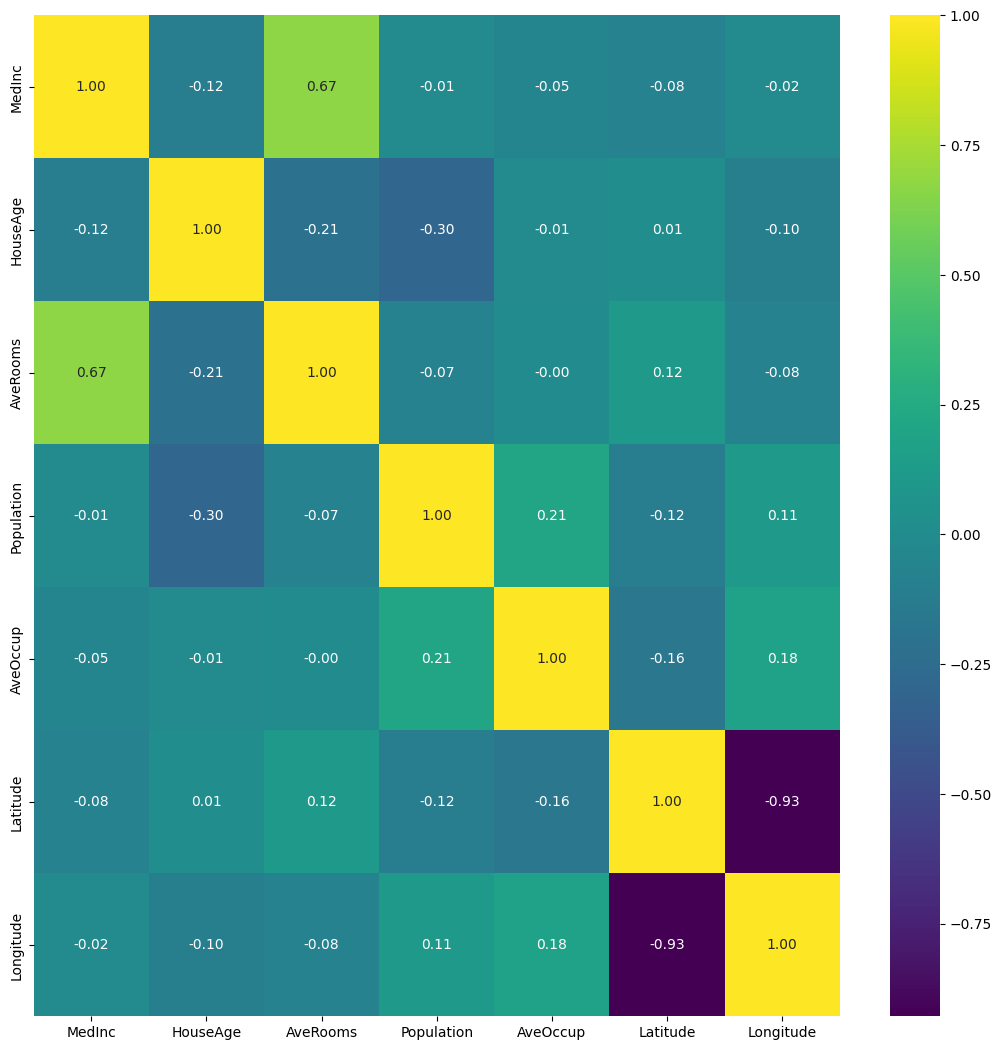

In [158]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr() ,annot= True,fmt='.02f',cmap='viridis')

In [ ]:
df.describe()

In [109]:
mask =df[df['AveRooms'] >10].index
# print(mask)
df.drop(mask ,inplace=True)
df[df['AveRooms'] >10]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Target


In [106]:
df.drop(columns='AveBedrms',inplace=True )

In [107]:
mask =df[df['Population']>5000].index

df.drop(mask,inplace=True)
df[df['Population']>5000]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Target


In [ ]:
mask =df[df['AveOccup']>6].index

df.drop(mask,inplace=True)
df[df['AveOccup']>6]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Target


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >]],
      dtype=object)

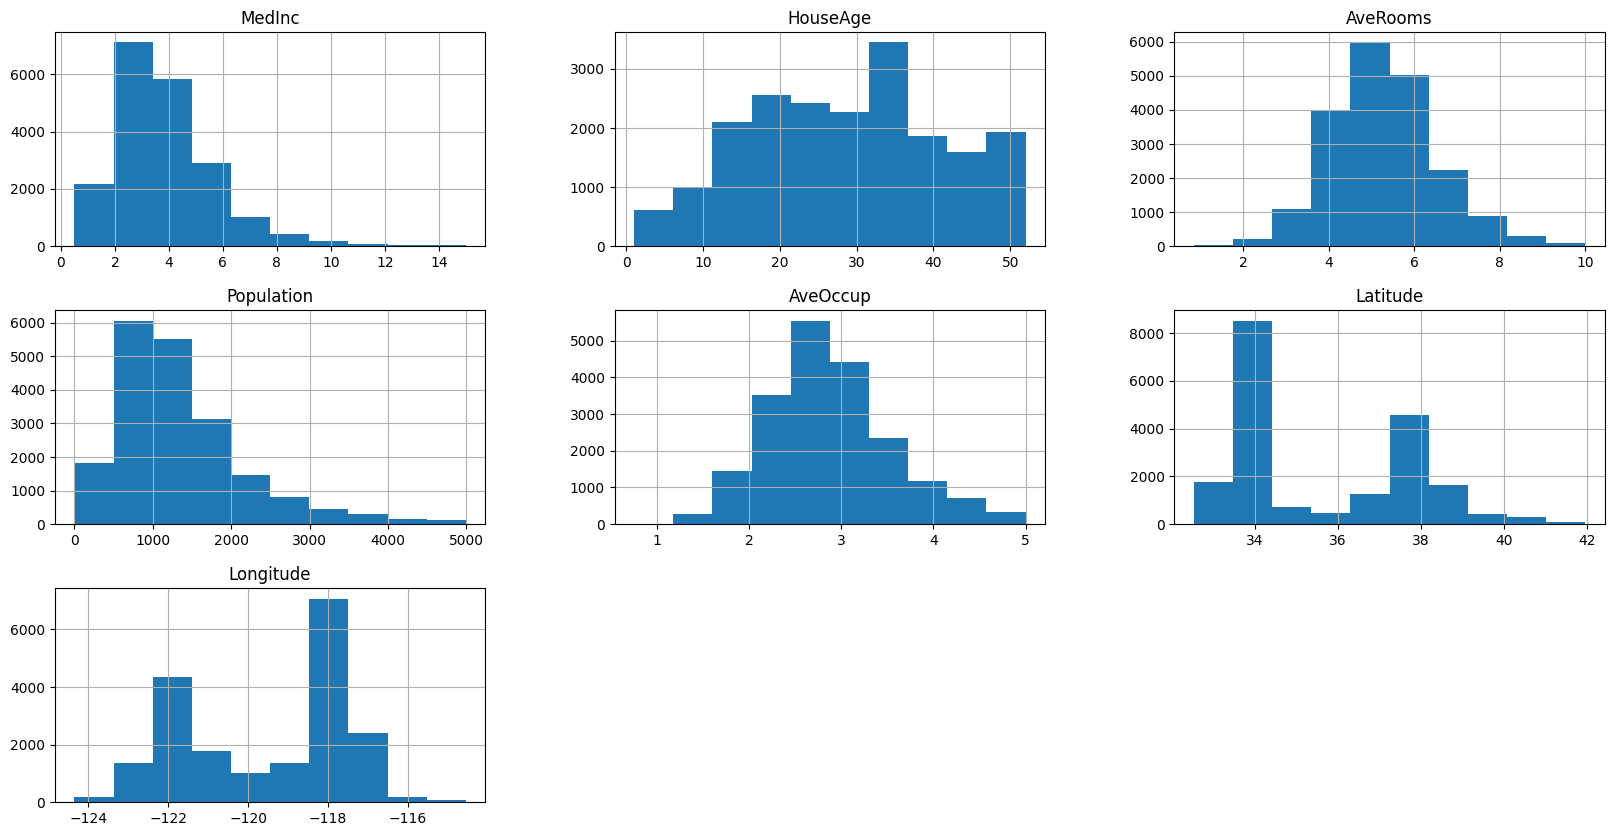

In [159]:
df.hist(figsize=(20,10))

In [115]:
y =df['Target']
df['Target'].index
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 19784, dtype: float64

In [120]:
df.drop(columns='Target',inplace=True)

In [ ]:
df.columns

In [155]:
# Split Data
X_train ,X_test ,y_train ,y_test = train_test_split(df,y,test_size=0.2 ,random_state=42)

#Scale Data
scale =StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

#Feature Selection
select =SelectKBest(k=7)
X_train_select =select.fit_transform(X_train_scale,y_train)
X_test_select = select.transform(X_test_scale)

#Choose Model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_select,y_train)
y_predict =model.predict(X_test_select)

#Error
mean_error = mean_absolute_error(y_test,y_predict)
median_error = median_absolute_error(y_test,y_predict)
R2_score = r2_score(y_test,y_predict)

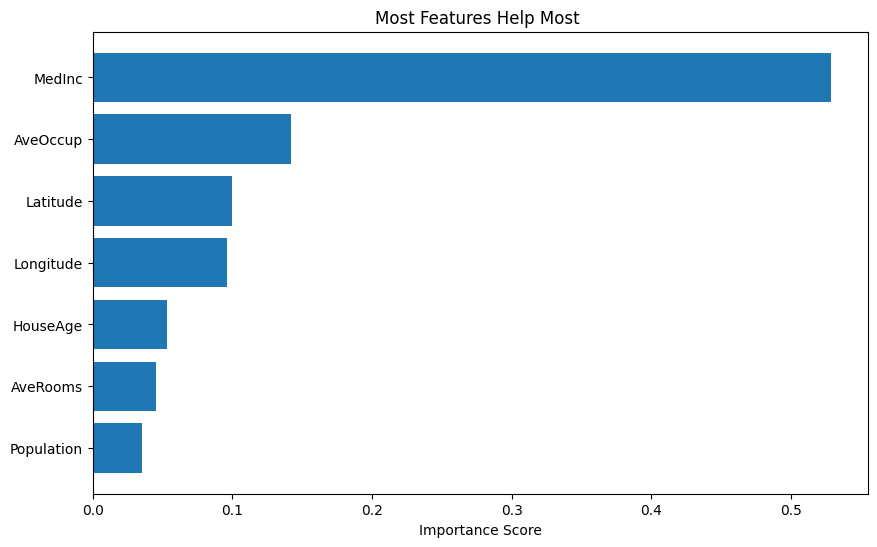

In [156]:
importance = model.feature_importances_
df_feature_importance =pd.DataFrame({'Features':df.columns ,'Importance':importance})
sorted_df_feature_importance = df_feature_importance.sort_values(by ='Importance',ascending=False)

plt.figure(figsize=(10,6))
plt.barh(sorted_df_feature_importance['Features'],sorted_df_feature_importance['Importance'])
plt.title('Most Features Help Most ')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
print(f'Mean Error : {mean_error}')
print(f'Median Error : {median_error}')
print(f'Score of Model : {R2_score}')

#Without Feature Selection
# Mean Error : 0.3203320456911803
# Median Error : 0.1986100000000004
# Score of Model : 0.8261014147075577

#With Feature Selection
# Mean Error : 0.3203320456911803
# Median Error : 0.1986100000000004
# Score of Model : 0.8261014147075577



Mean Error : 0.3203320456911803
Median Error : 0.1986100000000004
Score of Model : 0.8261014147075577
